# Filter CM2.6 air-sea fluxes

This is a first pass at filtering CM2.6 fields using [GCM-filters](https://gcm-filters.readthedocs.io/en/latest/).

CM2.6 uses the MOM5 ocean model which is on a B-grid. 

This notebook does the following:
1. Lists the relevant atmosphere variables from CM2.6
2. Lists the relevant ocean variables from CM2.6
3. Tests applying filters from `GCM-filters` to a sample field from CM2.6

In [1]:
import xarray as xr

## Atmospheric Data (daily fields)

In [2]:
import gcsfs
gcs = gcsfs.GCSFileSystem()

In [3]:
path = f'gs://cmip6/GFDL_CM2_6/control/atmos_daily.zarr'
ds_atm = xr.open_zarr(gcs.get_mapper(path))

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [4]:
ds_atm

<xarray.Dataset>
Dimensions:       (time: 29586, grid_yt: 360, grid_xt: 576, bnds: 2)
Coordinates:
  * grid_xt       (grid_xt) float64 0.3125 0.9375 1.562 ... 358.4 359.1 359.7
  * grid_yt       (grid_yt) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time          (time) object 0120-01-01 12:00:00 ... 0200-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables: (12/47)
    WVP           (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
    average_DT    (time) timedelta64[ns] dask.array<chunksize=(120,), meta=np.ndarray>
    average_T1    (time) object dask.array<chunksize=(120,), meta=np.ndarray>
    average_T2    (time) object dask.array<chunksize=(120,), meta=np.ndarray>
    evap          (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
    grid_xt_bnds  (grid_xt, bnds) float64 dask.array<chunksize=(576, 2), meta=np.ndarray>
    ...            ...
    v500          (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
    v700          (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
    v850          (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
    v_ref         (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
    wind          (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
    wind_max      (time, grid_yt, grid_xt) float32 dask.array<chunksize=(120, 360, 576), meta=np.ndarray>
Attributes:
    code_version:  $Name: fre-nctools-bronx-10 $
    filename:      01200101.atmos_daily.tile1.nc
    grid_tile:     N/A
    grid_type:     regular
    history:       fregrid --input_mosaic /ptmp/rds/WGA/MOSAIC/C180_mosaic.nc...
    title:         CM2.6_miniBling

#### Air-Sea variables in CM2.6 atmospheric data - all have dimensions `(time,grid_yt,grid_xt)`:

- lwdn_sfc: LW flux down at surface
- lwup_sfc: LW flux up at surface
- olr: outgoing longwave radiation
- swdn_sfc: shortwave flux down at surface
- t_ref: temperature at 2m
- u_ref: zonal wind component at 10m
- v_ref: meridional wind component at 10m

Other likely useful variables:
- t250: 250-mb temperature
- t500: 500-mb temperature
- t700: 700-mb temperature
- t850: 850-mb temperature
- u250: 250-mb u-wind
- u500: 500-mb u-wind
- u700: 700-mb u-wind
- u850: 850-mb u-wind
- v250: 250-mb v-wind
- v500: 500-mb v-wind
- v700: 700-mb v-wind
- v850: 850-mb v-wind
- wind: wind speed for flux calculations
- rh_ref: relative humidity at 2m
- q_ref: specific humidity at 2m

## Oceanic Data (monthly air-sea fields)

In [5]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/GFDL_CM2.6.yaml")
ds_oc  = cat["GFDL_CM2_6_control_ocean_boundary_flux"].to_dask()

In [6]:
ds_oc

<xarray.Dataset>
Dimensions:                    (time: 240, yu_ocean: 2700, xu_ocean: 3600, yt_ocean: 2700, xt_ocean: 3600, nv: 2)
Coordinates:
    geolat_c                   (yu_ocean, xu_ocean) float32 dask.array<chunksize=(338, 450), meta=np.ndarray>
    geolat_t                   (yt_ocean, xt_ocean) float32 dask.array<chunksize=(338, 450), meta=np.ndarray>
    geolon_c                   (yu_ocean, xu_ocean) float32 dask.array<chunksize=(338, 450), meta=np.ndarray>
    geolon_t                   (yt_ocean, xt_ocean) float32 dask.array<chunksize=(338, 450), meta=np.ndarray>
  * nv                         (nv) float64 1.0 2.0
  * time                       (time) object 0181-01-16 12:00:00 ... 0200-12-...
  * xt_ocean                   (xt_ocean) float64 -279.9 -279.8 ... 79.85 79.95
  * xu_ocean                   (xu_ocean) float64 -279.9 -279.8 ... 79.9 80.0
  * yt_ocean                   (yt_ocean) float64 -81.11 -81.07 ... 89.94 89.98
  * yu_ocean                   (yu_ocean) float64 -81.09 -81.05 ... 89.96 90.0
Data variables: (12/27)
    bottom_power_u             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    bottom_power_v             (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    calving_melt_heat          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    ekman_heat                 (time, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    ekman_we                   (time, yu_ocean, xt_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    evap                       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    ...                         ...
    sfc_hflux_pme              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    swflx                      (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    tau_x                      (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    tau_y                      (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    wind_power_u               (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
    wind_power_v               (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 2700, 3600), meta=np.ndarray>
Attributes:
    filename:   01810101.ocean_bdy_flux.nc
    grid_tile:  1
    grid_type:  mosaic
    title:      CM2.6_miniBling

#### Air-sea variables in CM2.6 ocean data - all dimensions are `(time,yt_ocean,xt_ocean)`:

- evap_heat: latent heat flux into ocean (<0 cools ocean)
    - surface downward latent heat flux
- lw_heat: longwave flux into ocean (<0 cools ocean)
    - surface net downward longwave flux
- net_sfc_heating: surface ocean heat flux coming through coupler and mass transfer
- sens_heat: sensible heat into ocean (<0 cools ocean)
    - surface downward sensible heat flux
- swflx: shortwave flux into ocean (>0 heats ocean)
    - surface net downward shortwave flux

Other likely useful variables:
- sfc_hflux_from_calving: heat flux (relative to 0C) from solid land ice entering ocean
    - temperature flux due to icebergs expressed as heat flux into sea water
- sfc_hflux_from_runoff: heat flux (relative to 0C) from liquid river runoff
    - temperature flux due to runoff expressed as heat flux into sea water
- sfc_hflux_from_water_evap: heat flux from evap transfer of water across ocean surface
    - temperature flux due to evaporation expressed as heat flux into sea water
- sfc_hflux_from_water_prec: heat flux from precip transfer of water across ocean surface
    - temperature flux due to rainfall expressed as heat flux into sea water
- sfc_hflux_from_pme: heat flux (relative to 0C) from pme transfer of water across ocean surface
- tau_x: i-directed wind stress forcing u-velocity `(time,yu_ocean,xu_ocean)`
    - surface downward x stress
- tau_y: j-directed wind stress forcing v-velocity `(time,yu_ocean,xu_ocean)`
    - surface downward y stress
- wind_power_u: power from wind stress in i-direction `(time,yu_ocean,xu_ocean)`
- wind_power_v: power from wind stress in j-direction `(time,yu_ocean,xu_ocean)`

## Filter some test data

Let's take a snapshot of the sensible heat term `sens_heat` as an example to test the filter.

*Note that sensible heat may not be one of the variables we will need to filter in our analysis, but is used here as an example only.*

*Note also that I'm not sure if the atmosphere grid variables are available on the cloud...*

In [13]:
pip install gcm_filters

  Using cached gcm_filters-0.2.3-py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import gcm_filters

In [23]:
# List all the filter types
list(gcm_filters.GridType)

[<GridType.REGULAR: 1>,
 <GridType.REGULAR_AREA_WEIGHTED: 2>,
 <GridType.REGULAR_WITH_LAND: 3>,
 <GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>,
 <GridType.IRREGULAR_WITH_LAND: 5>,
 <GridType.MOM5U: 6>,
 <GridType.MOM5T: 7>,
 <GridType.TRIPOLAR_REGULAR_WITH_LAND_AREA_WEIGHTED: 8>,
 <GridType.TRIPOLAR_POP_WITH_LAND: 9>,
 <GridType.VECTOR_C_GRID: 10>]

In [25]:
# List required variables for this `MOM5T` filter
gcm_filters.required_grid_vars(gcm_filters.GridType.MOM5T)

['wet_mask', 'dxt', 'dyt', 'dxu', 'dyu', 'area_t']

In [16]:
# List required variables for different filter
gcm_filters.required_grid_vars(gcm_filters.GridType.TRIPOLAR_REGULAR_WITH_LAND_AREA_WEIGHTED)

['area', 'wet_mask']

In [17]:
# List required variables for different filter
gcm_filters.required_grid_vars(gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED)

['area', 'wet_mask']

### Load ocean model grid

The model grid coordinates are stored in a separate zarr store, so we load them below.

In [7]:
ds_oc_grid  = cat["GFDL_CM2_6_grid"].to_dask()

In [8]:
ds_oc_grid

<xarray.Dataset>
Dimensions:         (yt_ocean: 2700, xt_ocean: 3600, yu_ocean: 2700, xu_ocean: 3600, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50)
Coordinates: (12/27)
    area_t          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_u          (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ...              ...
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
    wet             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * xu_ocean        (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.94 89.98
  * yu_ocean        (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
Data variables:
    *empty*
Attributes:
    NCO:      4.0.3

Hacky solution to needing all dimension names of input grid variables to be the same (see this [example](https://gcm-filters.readthedocs.io/en/latest/examples/example_vector_laplacian.html) in GCM-filters docs under "Filtering velocity")

In [ ]:
dxu = ds_oc_grid.dxu.swap_dims({"xu_ocean": "xt_ocean","yu_ocean": "yt_ocean"})
dyu = ds_oc_grid.dyu.swap_dims({"xu_ocean": "xt_ocean","yu_ocean": "yt_ocean"})

In [49]:
dxu

<xarray.DataArray 'dxu' (yt_ocean: 2700, xt_ocean: 3600)>
dask.array<open_dataset-88d509188b2d4c7d8e42a55fada33a96dxu, shape=(2700, 3600), dtype=float64, chunksize=(2700, 3600), chunktype=numpy.ndarray>
Coordinates:
    area_u    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxu       (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyu       (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_c  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_c  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    hu        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmu       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    xu_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
    yu_ocean  (yt_ocean) float64 -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
Dimensions without coordinates: yt_ocean, xt_ocean
Attributes:
    long_name:  width of C_cell
    units:      m

In [57]:
ds_oc_grid

<xarray.Dataset>
Dimensions:         (yt_ocean: 2700, xt_ocean: 3600, yu_ocean: 2700, xu_ocean: 3600, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50)
Coordinates: (12/27)
    area_t          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_u          (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ...              ...
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
    wet             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * xu_ocean        (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.94 89.98
  * yu_ocean        (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
Data variables:
    *empty*
Attributes:
    NCO:      4.0.3

In [10]:
# Find the minimum grid spacing
dx_min = min(ds_oc_grid.dxt.where(ds_oc_grid.wet).min(), ds_oc_grid.dyt.where(ds_oc_grid.wet).min())
dx_min = dx_min.values
dx_min

array(865.79775507)

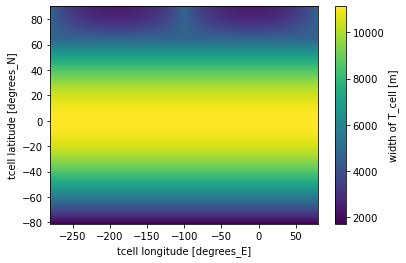

In [9]:
ds_oc_grid.dxt.plot()

#### Try using MOM5T Laplacian

In [65]:
specs = {
    'filter_scale': 100000, # 100km in m
    'dx_min': dx_min,
    'filter_shape': gcm_filters.FilterShape.GAUSSIAN
}

filter_MOM5T = gcm_filters.Filter(
    **specs,
    grid_type = gcm_filters.GridType.MOM5T,
    grid_vars = {'wet_mask':ds_oc_grid.wet,'dxt':ds_oc_grid.dxt,'dyt':ds_oc_grid.dyt,
                 'dxu':dxu,'dyu':dyu,'area_t':ds_oc_grid.area_t}
)

<string>:12: UserWarning: Filter scale much larger than grid scale -> numerical instability possible. More information on numerical instability can be found at https://gcm-filters.readthedocs.io/en/latest/theory.html.


This yields n_steps=128 which is very high and seems to be dominated by numerical instability. This is likely because the minimum x-direction grid scale (dx_min) is 800m, so filtering to 100km is quite large. Hence the UserWarning above.

#### Try using the Regular with land area weighted Laplacian

In [19]:
specs = {
    'filter_scale': 10, #in m
    'dx_min': 1,
    'filter_shape': gcm_filters.FilterShape.GAUSSIAN
}

filter_MOM5T = gcm_filters.Filter(
    **specs,
    grid_type = gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
    grid_vars = {'wet_mask':ds_oc_grid.wet,'area':ds_oc_grid.area_t}
)

In [20]:
filter_MOM5T

Filter(filter_scale=10, dx_min=1, filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=11, n_iterations=1, grid_type=<GridType.REGULAR_WITH_LAND_AREA_WEIGHTED: 4>)

In [ ]:
# Create the test data: sensible heat (single timestep)
test_data = ds_oc.sens_heat.isel(time=0)
test_data

In [22]:
# Apply the filter
%time result = filter_MOM5T.apply(test_data, dims=['yt_ocean','xt_ocean']) 

CPU times: user 878 ms, sys: 134 ms, total: 1.01 s
Wall time: 6.43 s


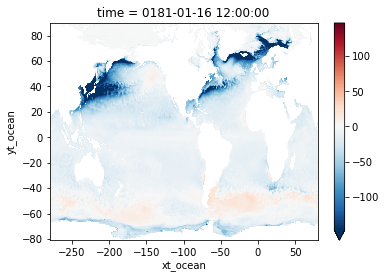

In [23]:
# Filtered field
result.plot(robust=True)

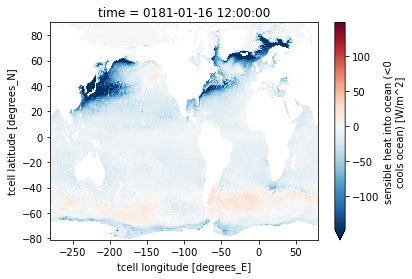

In [64]:
# Unfiltered field
test_data.plot(robust=True)

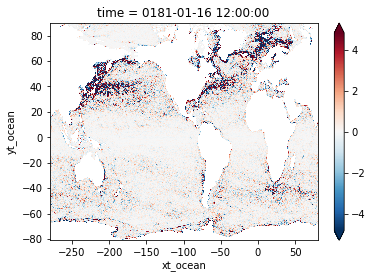

In [25]:
(result-test_data).plot(robust=True)

/srv/conda/envs/notebook/lib/python3.8/site-packages/gcm_filters/kernels.py:404: RuntimeWarning: divide by zero encountered in true_divide
  out1 /= self.area_t
/srv/conda/envs/notebook/lib/python3.8/site-packages/gcm_filters/kernels.py:404: RuntimeWarning: invalid value encountered in true_divide
  out1 /= self.area_t
/srv/conda/envs/notebook/lib/python3.8/site-packages/gcm_filters/kernels.py:410: RuntimeWarning: invalid value encountered in true_divide
  out2 /= self.area_t


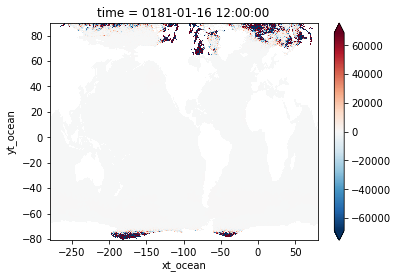

In [67]:
# Filtered field using MOM5T Laplacian --> numerically unstable?
result.plot(robust=True)